# Si結晶のトラジェクトリを使った双極子モーメントの計算 (v 0.0.1)

インプットファイル(input/)
 - input/si_wan_traj.xyz :: Si結晶のトラジェクトリ
 - input/si.wfc          :: Si結晶のwfcファイル


custom_trajクラス :: ase.atomsのリストにいくつかの簡単なメソッドを追加した自作クラス
 - save(prefix)             :: extxyz形式でファイルを保存する．ファイル名はprefix+"_refine.xyz"となる．
 - nglview_traj()     :: nglviewでの描画を可能にする．viewを返す．



In [1]:
# cpmdモジュールをロード

%load_ext autoreload
%autoreload 2
import cpmd

import ase.io
import numpy as np
import nglview as nv
from ase.io.trajectory import Trajectory
import cpmd.read_traj

In [2]:
# cpmdモジュールのリロード
%reload_ext autoreload

In [20]:
# シリコン原子のトラジェクトリ(cppp.xのoutput)を読み込む．
si_traj = cpmd.ReadPOS("input/si_wan_traj.xyz")
# 保存する場合はsaveメソッドを利用する．ファイル名はinputfilename+_refine.xyzとなる．
si_traj.save()

# WFcのトラジェクトリ(*.wfc)を読み込む
wan_traj=cpmd.ReadWFC("input/si.wfc",xyzfilename="input/si_wan_traj.xyz")

# 格子定数を出力する．（単位はAngstrom）
print(wan_traj.UNITCELL_VECTOR)

[[11.2617  0.      0.    ]
 [ 0.     11.2617  0.    ]
 [ 0.      0.     11.2617]]


In [19]:
# WFcとシリコン原子のトラジェクトリを合体させる．
merge_traj=wan_traj.merge_wfc_xyz(si_traj.ATOMS_LIST)

# 保存する場合はsaveメソッドを利用する．ファイル名はprefix+_refine.xyzとなる．
merge_traj.save("si_wan_merged")

0

In [15]:
# トラジェクトリを表示
view = merge_traj.nglview_traj()
view

NGLWidget(max_frame=499)

In [22]:
# 電荷を計算
charges=cpmd.get_charges(merge_traj.ATOMS_LIST)

# 電荷をトラジェクトリに追加
atoms_with_charge=cpmd.add_charges(merge_traj.ATOMS_LIST, charges)

# 双極子モーメントを計算
dipole_array=cpmd.calc_dipoles(atoms_with_charge)

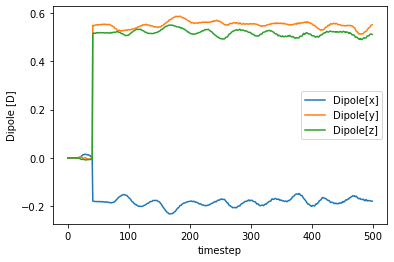

In [29]:
import matplotlib.pyplot as plt
import numpy as np
dipole_array=np.array(dipole_array)

x=np.arange(len(dipole_array))

plt.plot(x,dipole_array[:,0]-dipole_array[0,0],label="Dipole[x]")
plt.plot(x,dipole_array[:,1]-dipole_array[0,1],label="Dipole[y]")
plt.plot(x,dipole_array[:,2]-dipole_array[0,2],label="Dipole[z]")

plt.xlabel("timestep")
plt.ylabel("Dipole [D]")
plt.legend()